In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

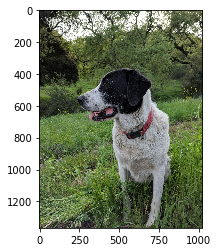

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('../DATA/sammy_face.jpg')

In [5]:
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

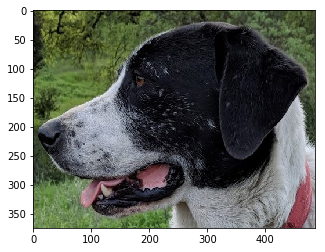

In [6]:
plt.imshow(face)

In [7]:
full.shape

(1367, 1025, 3)

In [8]:
face.shape

(375, 486, 3)

In [9]:
sum([1,2,3])

6

In [10]:
mystring = 'sum'

In [11]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [12]:
myfunc = eval(mystring)

In [13]:
myfunc([1,2,3])

6

In [14]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [15]:
res = cv2.matchTemplate(full, face, eval('cv2.TM_CCOEFF'))

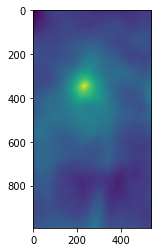

In [17]:
plt.imshow(res) #Heat map of match

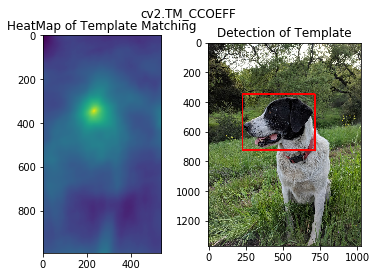

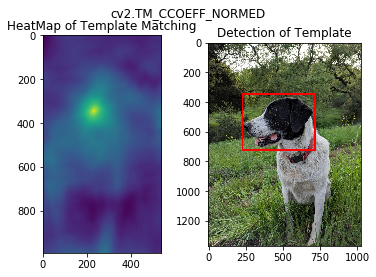

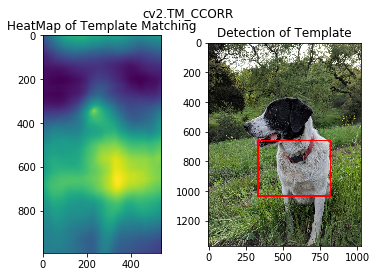

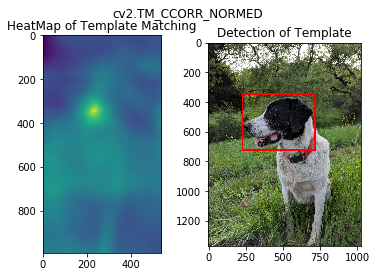

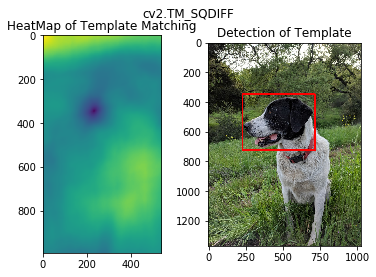

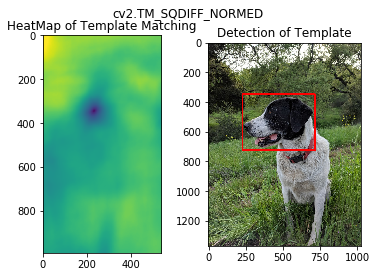

In [22]:
#Try all methods
for m in methods:
    
    #Create a copy
    full_copy = full.copy()
    
    method = eval(m)
    
    #Template matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    #Draw a rectangle
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y)
    else:
        top_left = max_loc #(x,y)
        
    height,width,channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, color=(255,0,0), thickness=10)
    
    #Plot and show the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HeatMap of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    #Title with the method used
    plt.suptitle(m)
    
    plt.show()
    
    print('\n\n')